# Question 1
a) sample 1000 data points (x) from a uniform distribution over (1,10) and plot $$y=5x+2$$

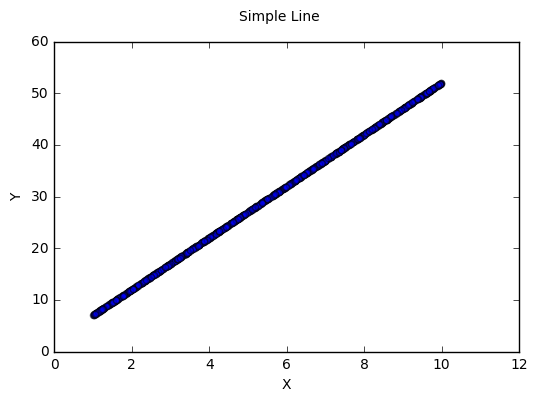

In [17]:
import numpy as np

x = np.random.uniform(1,10,1000)
y = 5*x + 2

import matplotlib.pyplot as plt
plt.scatter(x, y, s=20, alpha=0.5)
plt.suptitle('Simple Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


b) sample an additive noise (n) for each data point from $$\mathcal{N}\left(0,\sigma^2\right)$$ where $$\sigma^2=1$$ show the scatter plot $$y'=5\left(x+n\right)+2$$ against the plot of the previously defined y

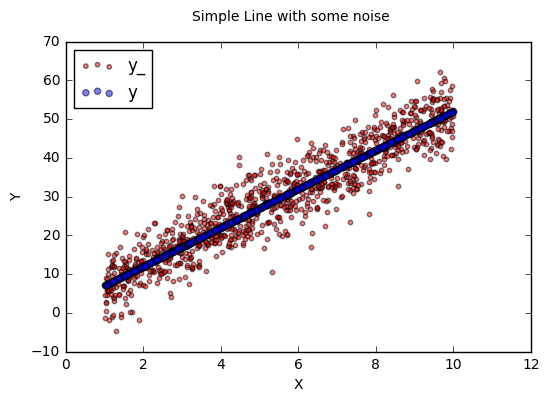

In [42]:
n = np.random.normal(0,1,1000)
y_noise = 5*(x+n) + 2

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y_noise, s=10, c='r', alpha=0.5, label='y_')
ax1.scatter(x, y , s=20, c='b', alpha=0.5, label='y')
plt.legend(loc='upper left');
plt.suptitle('Simple Line with some noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


c) perform linear regression to generate $\hat{y}$ an approximation of $y$ from $(y',x)$. show a scatter plot of $y'$ against a plot of $y$, and $\hat{y}$

--

the code snippets ahead assumes x and y are flat numpy arrays.
a flat array is not a row or a column vector. conversion is performed by indexing with an "empty new axis".
run the following cell to see this.

In [32]:
import numpy as np
a = np.array([1, 2, 3])
a_row_v = a[np.newaxis, :]
a_col_v = a[:, np.newaxis]
print(a.shape)
print(a_row_v.shape)
print(a_col_v.shape)

(3L,)
(1L, 3L)
(3L, 1L)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

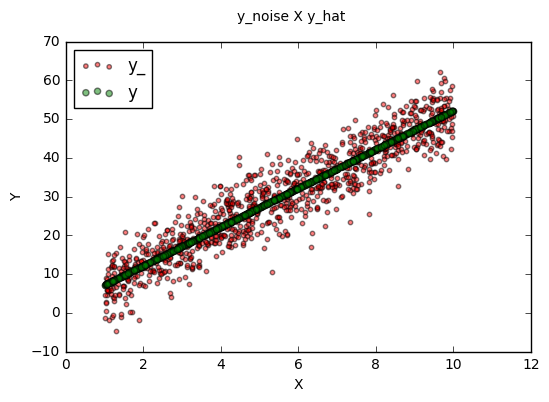

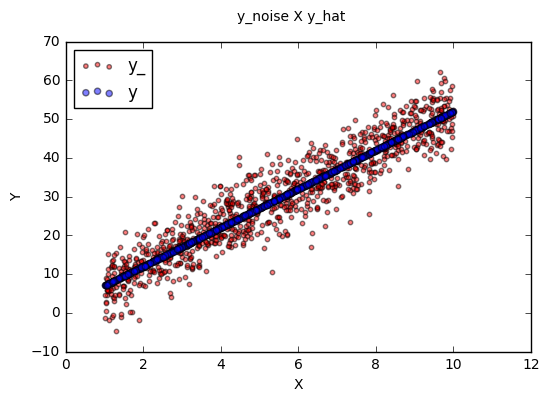

In [51]:
# create regression pipeline ( PolynomialFeatures is used to add a column of ones for the intercept)
regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# Tranform x and y_noise to np_array objects
x = np.array(x)
y_noise = np.array(y_noise)

# transform x from a flat array to a column vector
X = x[:, np.newaxis]

# fit linear model
regr.fit(X, y_noise)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_

# get prediction
y_hat = regr.predict(X)

# Plot y_noise against y_hat
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y_noise, s=10, c='r', alpha=0.5, label='y_')
ax1.scatter(x, y_hat , s=20, c='g', alpha=0.5, label='y')
plt.legend(loc='upper left');
plt.suptitle('y_noise X y_hat')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot y_noise against y
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y_noise, s=10, c='r', alpha=0.5, label='y_')
ax1.scatter(x, y , s=20, c='b', alpha=0.5, label='y')
plt.legend(loc='upper left');
plt.suptitle('y_noise X y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


d) compute the $r^2$ score and the square residual sum (RSS)

In [53]:
from sklearn.metrics import r2_score

In [69]:
# compute R^2
r2 = r2_score(y, y_hat) 
print r2

# sum of residuals
rss = np.sum((y_noise-y_hat)**2)
print rss

0.999773868616
23525.2837792


# Question 2
repeat for additive gaussian noise with $\sigma^2=2, 5, 10, 20 $. Are the estimated intercept and coefficient close to the true values? if not, why?

In [114]:
coef_list = []
var_list = [2,5,10,20]

for v in var_list:
    temp_std_dev = np.sqrt(v)
    n = np.random.normal(0,temp_std_dev,1000)
    y_noise = 5*(x+n) + 2
    y_noise = np.array(y_noise)
    
    # fit linear model
    regr.fit(X, y_noise)
    
    # get coefficients
    intercept = regr.named_steps['linearregression'].intercept_
    coef = regr.named_steps['linearregression'].coef_
    coef_list.append((intercept,coef[1]))    

# Printing the coeficients
print coef_list

# When the noise is generated from a normal distribution with a lower standard deviation
# the intercept and coeficients tend to be closer to the real values.
    


[(2.1307531622516152, 4.9947082049042022), (1.2852711863828574, 5.0802691859633322), (2.22556396873577, 5.0020303517733868), (3.794362074180313, 4.6899472441214494)]


# Question 3
a) Load the data in lin_reg_data.csv to a pandas data frame, and perform a linear regression for the x column Vs. the y column. Print the intercept and coefficient. 

In [173]:
import pandas as pd

lin_reg_data = pd.read_csv('lin_reg.csv')
x = np.array(lin_reg_data['x'])
y = np.array(lin_reg_data['y'])
X = x[:, np.newaxis]

# create regression pipeline ( PolynomialFeatures is used to add a column of ones for the intercept)
regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# fit linear model
regr.fit(X, y)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_

print 'intercept:', intercept
print 'coef:', coef[1]


intercept: 15.9778322955
coef: 0.572574050213


b) Repeat for the first 90% of the rows. Are the results similar? 

In [174]:
number_of_rows = int(0.9*len(lin_reg_data))
partial_dataFrame = lin_reg_data.head(number_of_rows)

x = np.array(partial_dataFrame['x'])
y = np.array(partial_dataFrame['y'])
X = x[:, np.newaxis]

# create regression pipeline ( PolynomialFeatures is used to add a column of ones for the intercept)
regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# fit linear model
regr.fit(X, y)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_

print 'intercept:', intercept
print 'coef:', coef[1]

# There is a relevant difference between the results.


intercept: 10.0226927846
coef: -3.00608837712


c) Perform a regression for the first 90% of the points for x and y you generated in Q1. Are the results there similar to those of the regression performed on all points?

In [182]:
x = np.random.uniform(1,10,1000)
n = np.random.normal(0,1,1000)
y_noise = 5*(x+n) + 2

# Tranform x and y_noise to np_array objects
x = np.array(x)
y_noise = np.array(y_noise)

# Get only the 90% first elements of Q1
number_of_rows = int(0.9*len(x))
x = x[:number_of_rows]
y_noise = y_noise[:number_of_rows]

# transform x from a flat array to a column vector
X = x[:, np.newaxis]

# create regression pipeline ( PolynomialFeatures is used to add a column of ones for the intercept)
regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# fit linear model
regr.fit(X, y_noise)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_

print 'intercept:', intercept
print 'coef:', coef[1]

# The intercept and the coef. are close to real value and the results are similar
# to those of the regression performed on all points


intercept: 2.37440773791
coef: 4.95568167454


d) Plot the residuals for the regression performed on the all rows of the data frame

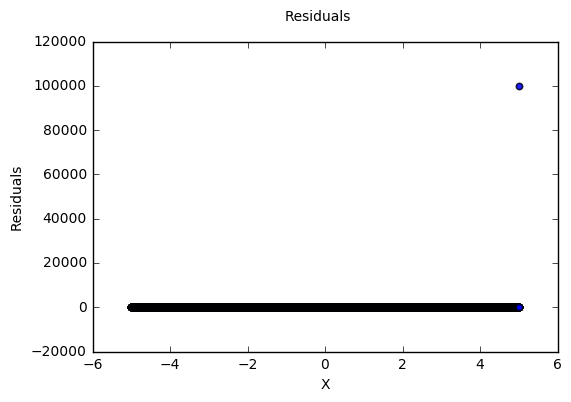

In [192]:
x = np.array(lin_reg_data['x'])
y = np.array(lin_reg_data['y'])
X = x[:, np.newaxis]

# create regression pipeline ( PolynomialFeatures is used to add a column of ones for the intercept)
regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# fit linear model
regr.fit(X, y)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_

# get prediction
y_hat = regr.predict(X)
residuals = abs(y_hat-y)

# Plot Residuals
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, residuals , s=20, c='b', alpha=0.5, label='y')
plt.suptitle('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()


e) plot a scatter plot of the x and y columns, can you explain this phenomenon?

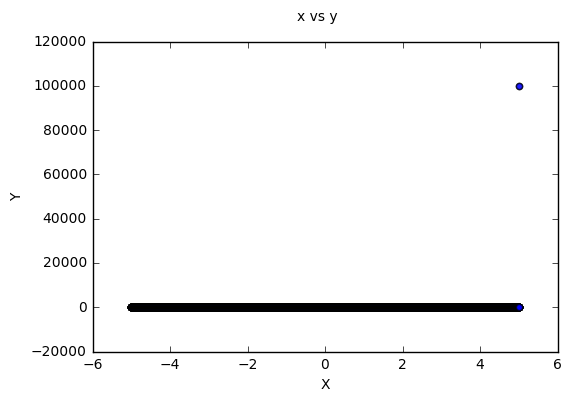

In [195]:
# Plot x against y
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y , s=20, c='b', alpha=0.5, label='y')
plt.suptitle('x X y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# The presence of the outliers in the final of the dataframe was the cause of the huge difference 
# in the coeficients predicted with the entire dataset and the ones predictes with the first 90% of it.